### Домашняя работа по Уроку 2
### Студент: Абрамов А.В.

## Домашнее задание <a class='anchor' id='hw'>

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети),
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [23]:
import keras
import tensorflow
from keras.layers import Dense       # Полносвязный линейный слой
from keras.models import Sequential  # Класс последовательности слоев
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras import utils
import pydot
import graphviz
import numpy as np

In [10]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 0


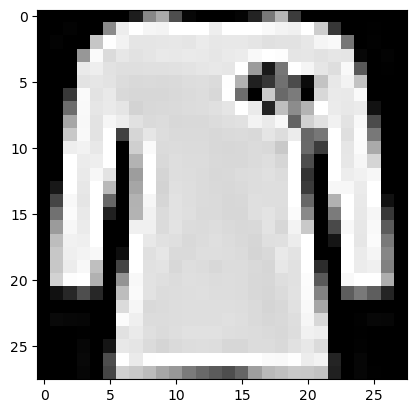

In [13]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [16]:
X_train.min(), X_train.max()

(0, 255)

In [18]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [19]:
# Вытягивание признаков в вектор
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [25]:
# Целевые значения в бинарный вид
y_train = utils.to_categorical(y_train_labels)
y_test = utils.to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Начинаем обучать модели с различными параметрами
### Этап 1: 2-хслойная модель с 8, 32, 128 нейронами во внутреннем слое
#### Для всех них примем: epochs=5, batch_size=200

In [59]:
# Модель: 2 слоя, внутренний слой - 8 нейронов

model = Sequential([
    Dense(8, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 6280      
                                                                 
 dense_7 (Dense)             (None, 10)                90        
                                                                 
Total params: 6370 (24.88 KB)
Trainable params: 6370 (24.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [61]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=200,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/5
300/300 [==============================] - 1s 1ms/step - loss: 1.8485 - accuracy: 0.4000 - val_loss: 1.4126 - val_accuracy: 0.5669
Epoch 2/5
300/300 [==============================] - 0s 1ms/step - loss: 1.0903 - accuracy: 0.6667 - val_loss: 0.9048 - val_accuracy: 0.7002
Epoch 3/5
300/300 [==============================] - 0s 1ms/step - loss: 0.8188 - accuracy: 0.7255 - val_loss: 0.7766 - val_accuracy: 0.7299
Epoch 4/5
300/300 [==============================] - 0s 1ms/step - loss: 0.7302 - accuracy: 0.7522 - val_loss: 0.7171 - val_accuracy: 0.7502
Epoch 5/5
300/300 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.7693 - val_loss: 0.6785 - val_accuracy: 0.7623


In [62]:
history.history['val_accuracy']
val_acc_2l_8n = history.history['val_accuracy']

In [63]:
# Модель: 2 слоя, внутренний слой - 32 нейрона

model = Sequential([
    Dense(32, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [65]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=200,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/5
300/300 [==============================] - 1s 2ms/step - loss: 1.4646 - accuracy: 0.5271 - val_loss: 1.0062 - val_accuracy: 0.6844
Epoch 2/5
300/300 [==============================] - 0s 1ms/step - loss: 0.8660 - accuracy: 0.7252 - val_loss: 0.7932 - val_accuracy: 0.7322
Epoch 3/5
300/300 [==============================] - 0s 1ms/step - loss: 0.7302 - accuracy: 0.7637 - val_loss: 0.7066 - val_accuracy: 0.7612
Epoch 4/5
300/300 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.7834 - val_loss: 0.6556 - val_accuracy: 0.7759
Epoch 5/5
300/300 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.7970 - val_loss: 0.6229 - val_accuracy: 0.7863


In [66]:
history.history['val_accuracy']
val_acc_2l_32n = history.history['val_accuracy']

In [68]:
# Модель: 2 слоя, внутренний слой - 128 нейронов

model = Sequential([
    Dense(128, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [70]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=200,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/5
300/300 [==============================] - 1s 2ms/step - loss: 1.1965 - accuracy: 0.6450 - val_loss: 0.8571 - val_accuracy: 0.7220
Epoch 2/5
300/300 [==============================] - 0s 1ms/step - loss: 0.7589 - accuracy: 0.7588 - val_loss: 0.7134 - val_accuracy: 0.7639
Epoch 3/5
300/300 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.7860 - val_loss: 0.6511 - val_accuracy: 0.7840
Epoch 4/5
300/300 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.8007 - val_loss: 0.6131 - val_accuracy: 0.7951
Epoch 5/5
300/300 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.8106 - val_loss: 0.5891 - val_accuracy: 0.8025


In [71]:
history.history['val_accuracy']
val_acc_2l_128n = history.history['val_accuracy']

### Анализ полученных значений метрики

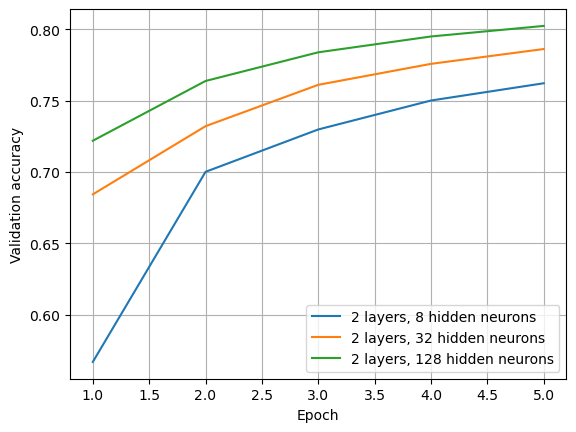

In [72]:
# Графическое сравнение точности на валидационных данных разных параметров модели: 

axeX=[1,2,3,4,5]

plt.plot(axeX,val_acc_2l_8n, label='2 layers, 8 hidden neurons')
plt.plot(axeX,val_acc_2l_32n, label='2 layers, 32 hidden neurons')
plt.plot(axeX,val_acc_2l_128n, label='2 layers, 128 hidden neurons')

plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.legend()
plt.grid()

#### Вывод: наглядно видно, что при повышении число нейронов во внутреннем слое (при неизменных остальных параметрах модели), точность предсказания выше на всех эпохах (прогонах).

### Этап 2: 2-х, 3-х, 5-ти, 10-тислойная модель с 64 нейронами во внутреннем слое
#### Для всех них примем: epochs=5, batch_size=200

In [73]:
# Модель: 2 слоя, внутренний слой - 64 нейрона

model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [75]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=200,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/5
300/300 [==============================] - 1s 2ms/step - loss: 1.3180 - accuracy: 0.5979 - val_loss: 0.9218 - val_accuracy: 0.6944
Epoch 2/5
300/300 [==============================] - 0s 1ms/step - loss: 0.8004 - accuracy: 0.7411 - val_loss: 0.7486 - val_accuracy: 0.7511
Epoch 3/5
300/300 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.7775 - val_loss: 0.6739 - val_accuracy: 0.7752
Epoch 4/5
300/300 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.7957 - val_loss: 0.6293 - val_accuracy: 0.7882
Epoch 5/5
300/300 [==============================] - 0s 1ms/step - loss: 0.5899 - accuracy: 0.8061 - val_loss: 0.6004 - val_accuracy: 0.7955


In [76]:
history.history['val_accuracy']
val_acc_2l_64n = history.history['val_accuracy']

In [78]:
# Модель: 3 слоя, внутренние слои - по 64 нейрона

model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                50240     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [80]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=200,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/5
300/300 [==============================] - 1s 2ms/step - loss: 1.4676 - accuracy: 0.5472 - val_loss: 0.9809 - val_accuracy: 0.6664
Epoch 2/5
300/300 [==============================] - 0s 1ms/step - loss: 0.8326 - accuracy: 0.7170 - val_loss: 0.7623 - val_accuracy: 0.7355
Epoch 3/5
300/300 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.7666 - val_loss: 0.6762 - val_accuracy: 0.7730
Epoch 4/5
300/300 [==============================] - 0s 1ms/step - loss: 0.6263 - accuracy: 0.7922 - val_loss: 0.6221 - val_accuracy: 0.7909
Epoch 5/5
300/300 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.8101 - val_loss: 0.5851 - val_accuracy: 0.8030


In [81]:
history.history['val_accuracy']
val_acc_3l_64n = history.history['val_accuracy']

In [84]:
# Модель: 5 слоев, внутренние слои - по 64 нейрона

model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
Total params: 63370 (247.54 KB)
Trainable params: 63370 (247.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [86]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=200,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/5
300/300 [==============================] - 1s 2ms/step - loss: 1.6213 - accuracy: 0.4534 - val_loss: 0.9788 - val_accuracy: 0.6426
Epoch 2/5
300/300 [==============================] - 0s 2ms/step - loss: 0.8063 - accuracy: 0.7085 - val_loss: 0.7350 - val_accuracy: 0.7349
Epoch 3/5
300/300 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.7656 - val_loss: 0.6461 - val_accuracy: 0.7709
Epoch 4/5
300/300 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.7916 - val_loss: 0.5906 - val_accuracy: 0.7948
Epoch 5/5
300/300 [==============================] - 1s 2ms/step - loss: 0.5535 - accuracy: 0.8060 - val_loss: 0.5596 - val_accuracy: 0.8029


In [87]:
history.history['val_accuracy']
val_acc_5l_64n = history.history['val_accuracy']

In [90]:
# Модель: 10 слоев, внутренние слои - по 64 нейрона

model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),    
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                50240     
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 64)               

In [91]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [92]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=200,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/5
300/300 [==============================] - 1s 3ms/step - loss: 2.2672 - accuracy: 0.1718 - val_loss: 2.1719 - val_accuracy: 0.2375
Epoch 2/5
300/300 [==============================] - 1s 2ms/step - loss: 1.6102 - accuracy: 0.4006 - val_loss: 1.0780 - val_accuracy: 0.5761
Epoch 3/5
300/300 [==============================] - 1s 2ms/step - loss: 0.9426 - accuracy: 0.6185 - val_loss: 0.8377 - val_accuracy: 0.6581
Epoch 4/5
300/300 [==============================] - 1s 2ms/step - loss: 0.7857 - accuracy: 0.6823 - val_loss: 0.7431 - val_accuracy: 0.7137
Epoch 5/5
300/300 [==============================] - 1s 2ms/step - loss: 0.7013 - accuracy: 0.7304 - val_loss: 0.6783 - val_accuracy: 0.7601


In [93]:
history.history['val_accuracy']
val_acc_10l_64n = history.history['val_accuracy']

### Анализ полученных значений метрики

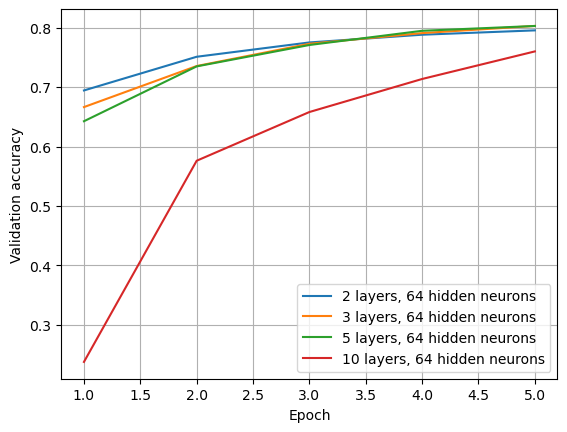

In [94]:
# Графическое сравнение точности на валидационных данных разных параметров модели: 

axeX=[1,2,3,4,5]

plt.plot(axeX,val_acc_2l_64n, label='2 layers, 64 hidden neurons')
plt.plot(axeX,val_acc_3l_64n, label='3 layers, 64 hidden neurons')
plt.plot(axeX,val_acc_5l_64n, label='5 layers, 64 hidden neurons')
plt.plot(axeX,val_acc_10l_64n, label='10 layers, 64 hidden neurons')

plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.legend()
plt.grid()

#### Вывод: видно, что повышение числа слоев не дает заметного прироста точности на валидационных данных (при неизменных остальных параметрах модели). А при большом кол-ве слое (здесь 10) точность предсказания заметно ниже, что говорит об избыточности слоев для данной задачи.

## Этап 3: 3-хслойная модель с 64 нейронами во внутреннем слое с разными оптимизаторами (SGD, Adam, RMSProp)
#### Для всех них примем: epochs=5, batch_size=200

In [143]:
# Модель: 3 слоя, внутренние слои - по 64 нейрона

model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 64)                50240     
                                                                 
 dense_60 (Dense)            (None, 64)                4160      
                                                                 
 dense_61 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [137]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=200,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/5
300/300 [==============================] - 1s 2ms/step - loss: 1.3846 - accuracy: 0.5650 - val_loss: 0.9512 - val_accuracy: 0.6703
Epoch 2/5
300/300 [==============================] - 0s 2ms/step - loss: 0.8285 - accuracy: 0.7134 - val_loss: 0.7641 - val_accuracy: 0.7251
Epoch 3/5
300/300 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.7602 - val_loss: 0.6753 - val_accuracy: 0.7635
Epoch 4/5
300/300 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7891 - val_loss: 0.6176 - val_accuracy: 0.7870
Epoch 5/5
300/300 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.8053 - val_loss: 0.5843 - val_accuracy: 0.7957


In [138]:
history.history['val_accuracy']
val_acc_SGD = history.history['val_accuracy']

In [140]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [141]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=200,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/5
300/300 [==============================] - 1s 2ms/step - loss: 0.6414 - accuracy: 0.7818 - val_loss: 0.4735 - val_accuracy: 0.8346
Epoch 2/5
300/300 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8531 - val_loss: 0.4226 - val_accuracy: 0.8481
Epoch 3/5
300/300 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8648 - val_loss: 0.4107 - val_accuracy: 0.8517
Epoch 4/5
300/300 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8730 - val_loss: 0.3852 - val_accuracy: 0.8649
Epoch 5/5
300/300 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8787 - val_loss: 0.3841 - val_accuracy: 0.8645


In [142]:
history.history['val_accuracy']
val_acc_Adam = history.history['val_accuracy']

In [144]:
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

In [145]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=200,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/5
300/300 [==============================] - 1s 2ms/step - loss: 0.6433 - accuracy: 0.7781 - val_loss: 0.5123 - val_accuracy: 0.8149
Epoch 2/5
300/300 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8421 - val_loss: 0.4394 - val_accuracy: 0.8422
Epoch 3/5
300/300 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8591 - val_loss: 0.4136 - val_accuracy: 0.8489
Epoch 4/5
300/300 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8694 - val_loss: 0.3909 - val_accuracy: 0.8563
Epoch 5/5
300/300 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8766 - val_loss: 0.4156 - val_accuracy: 0.8451


In [146]:
history.history['val_accuracy']
val_acc_RMSProp = history.history['val_accuracy']

### Анализ полученных значений метрики

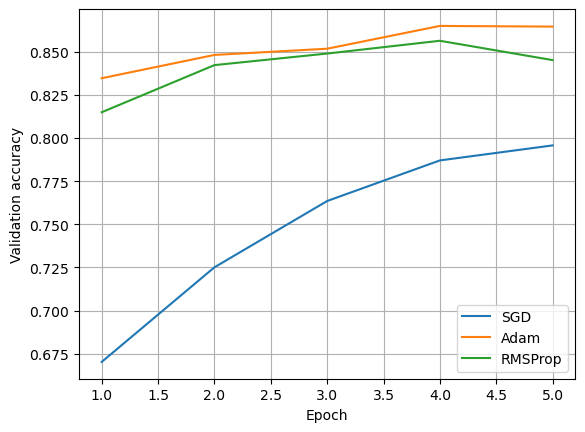

In [147]:
# Графическое сравнение точности на валидационных данных разных параметров модели: 

axeX=[1,2,3,4,5]

plt.plot(axeX, val_acc_SGD, label='SGD')
plt.plot(axeX, val_acc_Adam, label='Adam')
plt.plot(axeX, val_acc_RMSProp, label='RMSProp')

plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.legend()
plt.grid()

#### Вывод: применение оптимизаторов Adam, RMSProp дают более высокую точность на валидационных данных (при неизменных остальных параметрах модели), чем SGD.

### Таким образом, улучшить точность на валидационном наборе удалось с помощью повышения числа нейронов во внутреннем слое, а также применения оптимизатора Adam или RMSProp.